**Perceptron with Python**

**1. scalling :**

We notice the important effect on the classifier.


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn import preprocessing
scaled_X = preprocessing.minmax_scale(cancer.data)

from sklearn.linear_model import Perceptron
pc = Perceptron()

Perform a 5CV on the breast cancer dataset

For each classifier, 2 options to realize the CV :
- pc.fit = training / pc.predict = prediction
- or cross_val score

Warnings:simpletfilter('ignore') = allows to ignore warnings


In [ ]:
import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import cross_val_score
from sklearn import metrics

#Perform 5-fold cross validation
scores = cross_val_score(pc, cancer.data, cancer.target, cv=5)
print("Cross-validated scores:", scores)
print("Average 5CV score is %f +-%f(std)" %(scores.mean(), scores.std()))
# Perform 5-fold cross validation on scaled data
scores = cross_val_score(pc, scaled_X, cancer.target, cv=5)
print("Cross-Validated scores:", scores)
print("Average 5CV score is %f +-%f(std)" %(scores.mean(), scores.std()))

Cross-validated scores: [0.92982456 0.88596491 0.87719298 0.87719298 0.84955752]
Average 5CV score is 0.883947 +-0.026010(std)
Cross-Validated scores: [0.96491228 0.97368421 0.95614035 0.97368421 0.9380531 ]
Average 5CV score is 0.961295 +-0.013318(std)


**Get the learned coefficients**

Allows to see which attribute is the most important so we can make a ranking

pc.coef : all coefficient's values in the attributes zip order : allows to send back coples between 2 lists (1,1 / 2,2...)

The number of epochs is limited by default to 100 for each iteration. Here CV is equal to 5 so 100 * 5. Therefore, for a NN (neuronal network), we should do a hold-out otherwise it's too costly.


In [ ]:
pc.fit(scaled_X, cancer.target)
print(pc)
print(list(zip(cancer.feature_names, pc.coef_[0])))

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
[('mean radius', -1.4722419423541104), ('mean texture', -2.742644572201558), ('mean perimeter', -1.4308617234468963), ('mean area', -2.8933191940615046), ('mean smoothness', 0.2827480364719732), ('mean compactness', 2.0442610882767926), ('mean concavity', -3.6620501405810617), ('mean concave points', -5.1208548707753465), ('mean symmetry', 0.37878787878788656), ('mean fractal dimension', 4.248525695029491), ('radius error', -8.001086366105376), ('texture error', 0.6687146393210754), ('perimeter error', -5.3308344720350584), ('area error', -4.721239152929218), ('smoothness error', -1.018288744603458), ('compactness error', 3.343850452128464), ('concavity error', 1.5728055555555533), ('concave points error'

**Effect of the number of epochs**

We'll get the accuracy of perceptron with higher number of epochs

Epoch : it's a learning on the complete dataset.
We need some of them to learn correctly

One iteration is a passage on one data so there are several iteration for each epoch

Here :
- effect of the number of epoch on the classifier
- we stop at the 25th iteration because there is a merging at this iteration



[0.956047197640118, 0.9612948299953423, 0.9612948299953423, 0.9612948299953423, 0.9612948299953423, 0.9612948299953423, 0.9612948299953423, 0.9612948299953423, 0.9612948299953423, 0.9612948299953423]


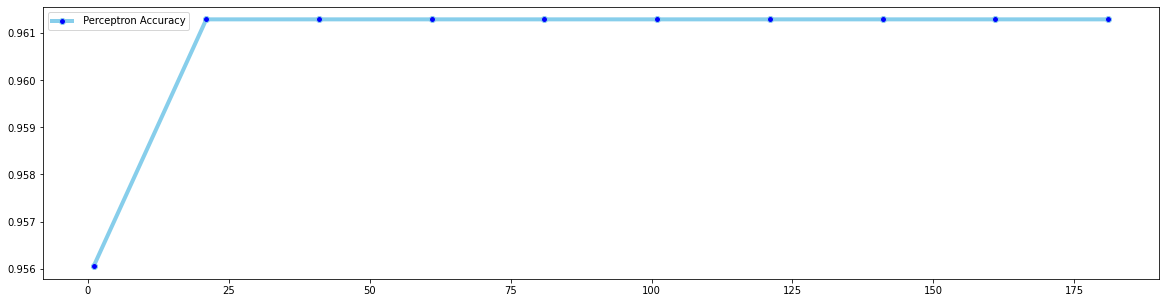

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

max_it = 200
max_it+=1
accuracy = []
for it in range(10,max_it,20):
  pc = Perceptron(max_iter=it)
  scores = cross_val_score(pc, scaled_X, cancer.target, cv=5)
  accuracy.append(scores.mean())
print(accuracy)
plt.figure(figsize=(20,5))
plt.plot(range(1,max_it,20), accuracy, label=" Perceptron Accuracy", marker='o', markerfacecolor='blue', color='skyblue', linewidth=4)
plt.legend()


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn import preprocessing
scaled_X = preprocessing.minmax_scale(cancer.data)

**Neural Networks : MLP**

Create the MLP classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

Perform a 5CV on the breast cancer dataset

In [ ]:
# import warnings
# warnings.simplefilter('ignore')
# Command if needed

from sklearn.model_selection import cross_val_score
from sklearn import metrics

#Perform 5-fold cross validation
scores = cross_val_score(mlp, cancer.data, cancer.target, cv=5)
print("Cross-validated scores:", scores)
print("Average 5CV score is %f +-%f(std)" %(scores.mean(), scores.std()))
# Perform 5-fold cross validation
scores = cross_val_score(mlp, scaled_X, cancer.target, cv=5)
print("Cross-Validated scores:", scores)
print("Average 5CV score is %f +-%f(std)" %(scores.mean(), scores.std()))

Cross-validated scores: [0.9122807  0.9122807  0.89473684 0.93859649 0.91150442]
Average 5CV score is 0.913880 +-0.014058(std)
Cross-Validated scores: [0.95614035 0.96491228 0.97368421 0.96491228 0.98230088]
Average 5CV score is 0.968390 +-0.008897(std)


**Effect of the number of hidden units**

We'll get the accuracy of MLP with different number of hidden units. We'll perform the experiment with three different number of hidden layers

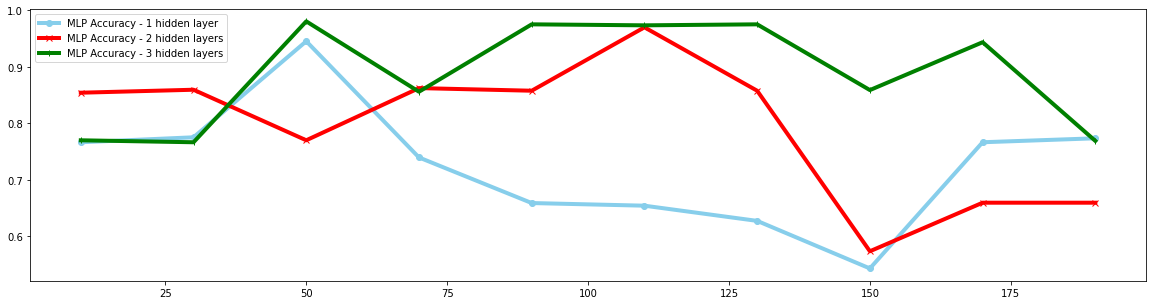

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

max_size = 200

accuracy, accuracy2, accuracy3 = [], [], []
for it in range(10,max_size+1, 20):
    mlp = MLPClassifier(hidden_layer_sizes=(max_size,1))
    scores = cross_val_score(mlp, scaled_X, cancer.target, cv=3)
    accuracy.append(scores.mean())
    mlp = MLPClassifier(hidden_layer_sizes=(max_size,2))
    scores = cross_val_score(mlp, scaled_X, cancer.target, cv=3)
    accuracy2.append(scores.mean())
    mlp = MLPClassifier(hidden_layer_sizes=(max_size,3))
    scores = cross_val_score(mlp, scaled_X,cancer.target, cv=3)
    accuracy3.append(scores.mean())

plt.figure(figsize=(20,5))
plt.plot(range(10,max_size, 20), accuracy, label="MLP Accuracy - 1 hidden layer", marker='o', color='skyblue', linewidth=4)
plt.plot(range(10,max_size, 20), accuracy2, label="MLP Accuracy - 2 hidden layers", marker='x', color='red', linewidth=4)
plt.plot(range(10,max_size, 20), accuracy3, label="MLP Accuracy - 3 hidden layers", marker='|', color='green', linewidth=4)
plt.legend()


**Effect of the activation function**


We'll get the accuracy of MLP with different activation function

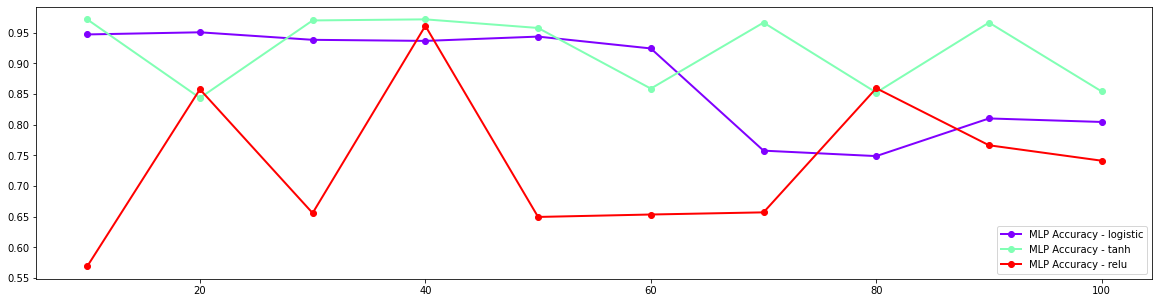

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

activation = ["logistic", "tanh", "relu"]
max_size = 100
max_size+=1
accuracies = []
for fn in activation:
    accuracy = []
    for it in range(10,max_size, 10):
        mlp = MLPClassifier(hidden_layer_sizes=(max_size,2), activation=fn)
        scores = cross_val_score(mlp, scaled_X, cancer.target, cv=3)
        accuracy.append(scores.mean())
    accuracies.append(accuracy)

plt.figure(figsize=(20,5))

from matplotlib.pyplot import cm
import numpy as np
colors=cm.rainbow(np.linspace(0,1,len(activation)))

for index, lst in enumerate(accuracies):
    plt.plot(range(10,max_size, 10), lst, label="MLP Accuracy - "+str(activation[index]), marker='o', color=colors[index], linewidth=2)
plt.legend()

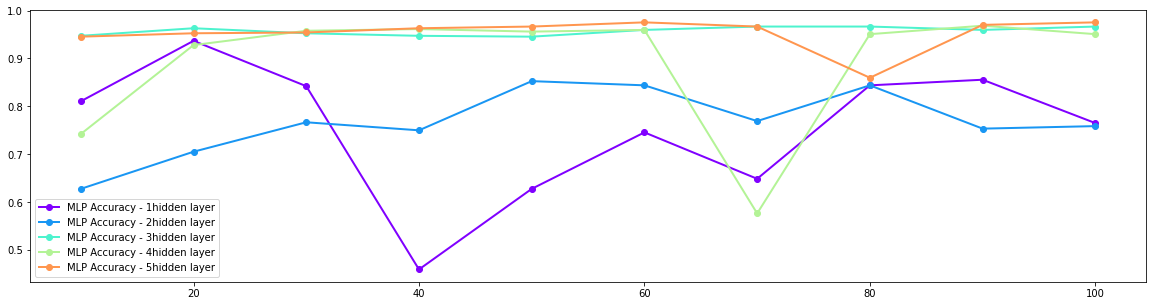

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

max_size = 100
max_size+=1
max_nh1 = 5
max_nh1+=1
accuracies = []
for nh1 in range(1, max_nh1):
    accuracy = []
    for size in range(10,max_size, 10):
        mlp = MLPClassifier(hidden_layer_sizes=(size,nh1))
        scores = cross_val_score(mlp, scaled_X, cancer.target, cv=3)
        accuracy.append(scores.mean())
    accuracies.append(accuracy)

plt.figure(figsize=(20,5))

from matplotlib.pyplot import cm
import numpy as np
colors=cm.rainbow(np.linspace(0,1,max_nh1))

for index, lst in enumerate(accuracies):
    plt.plot(range(10,max_size,10), lst, label="MLP Accuracy - "+str(index+1)+"hidden layer", marker='o', color=colors[index], linewidth=2)
plt.legend()